<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/dev%2Fquiquex%2Fpatternrecognition/Modelos_Lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineal Models Practice



Downloand the datasets:
For this practice we need:


*   Covid Dataset
*   Human_R data



In [148]:
# Datasets Download
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/Covid Dataset.csv' # Covid Dataset
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/HumanR_data.csv'   # HumanR_data

--2025-02-02 23:43:45--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/Covid%20Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405339 (396K) [text/plain]
Saving to: ‘Covid Dataset.csv’

Covid Dataset.csv   100%[===================>] 395.84K  --.-KB/s    in 0.005s  

2025-02-02 23:43:45 (71.3 MB/s) - ‘Covid Dataset.csv’ saved [405339/405339]

--2025-02-02 23:43:45--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/HumanR_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent,

## Importing the necessary libraries

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

# Reading the datasets
covidDataset = pd.read_csv("Covid Dataset.csv")
humanRDataset = pd.read_csv("HumanR_data.csv")


## Human R Dataset


### Exploring variables

In [150]:
humanRDataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [151]:
humanRDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [152]:
humanRDataset.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [153]:
nan_in_df = humanRDataset.isnull().sum()
print(nan_in_df)

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [154]:
print(humanRDataset['MarriedID'].unique())
print(humanRDataset['HispanicLatino'].unique())
print(humanRDataset['RaceDesc'].unique())

[0 1]
['No' 'Yes' 'no' 'yes']
['White' 'Black or African American' 'Two or more races' 'Asian'
 'American Indian or Alaska Native' 'Hispanic']


In [155]:
# The first thing that I noticed is that there are some columns that are not necessary
# One important practice is do not modify the original dataset, thats why I will use df
df = humanRDataset.drop(columns = ['Employee_Name','EmpID','MarriedID','MaritalStatusID','Position', 'Sex',
                                    'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
                                    'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
                                    'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
                                    'LastPerformanceReview_Date', 'DOB', 'State', 'Zip'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GenderID                311 non-null    int64  
 1   EmpStatusID             311 non-null    int64  
 2   DeptID                  311 non-null    int64  
 3   PerfScoreID             311 non-null    int64  
 4   FromDiversityJobFairID  311 non-null    int64  
 5   Salary                  311 non-null    int64  
 6   Termd                   311 non-null    int64  
 7   PositionID              311 non-null    int64  
 8   EngagementSurvey        311 non-null    float64
 9   EmpSatisfaction         311 non-null    int64  
 10  SpecialProjectsCount    311 non-null    int64  
 11  DaysLateLast30          311 non-null    int64  
 12  Absences                311 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 31.7 KB


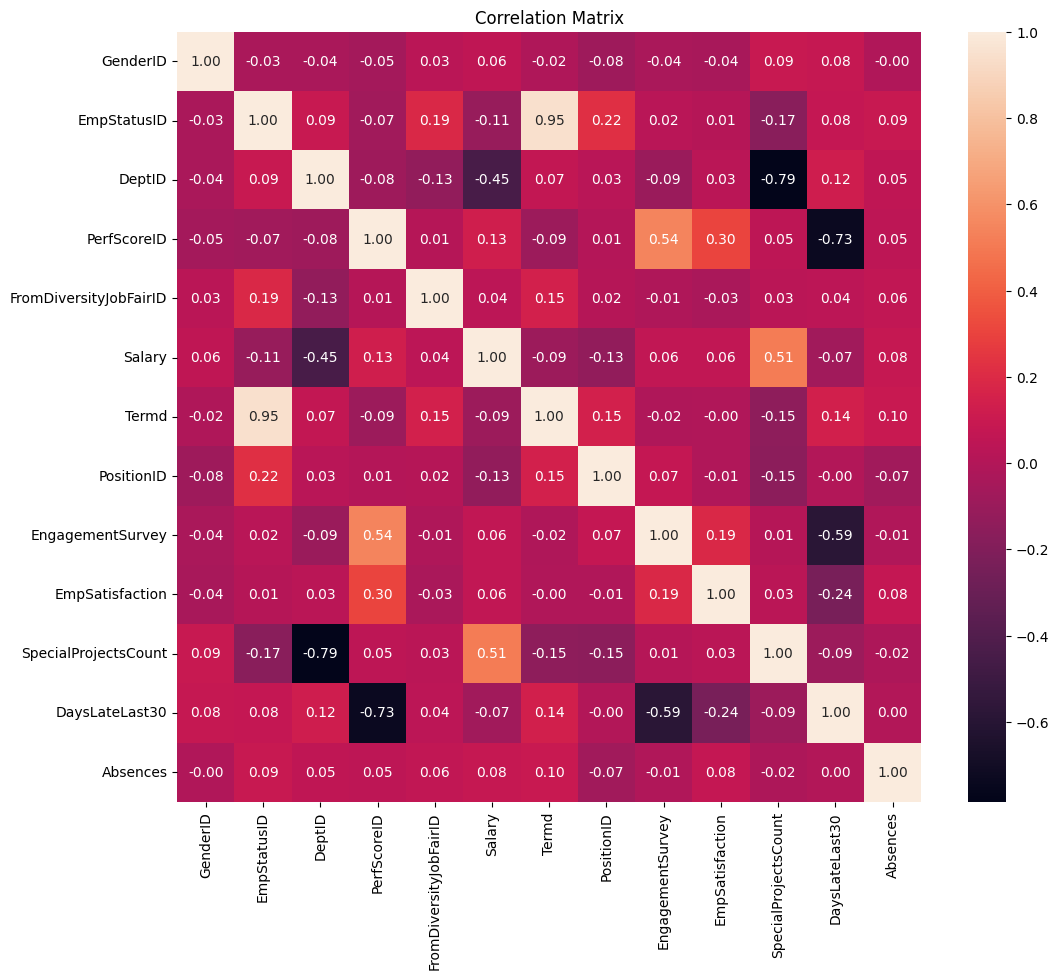

In [156]:
# Now with this dataset I can use a correlation matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True, fmt = ".2f")

plt.title('Correlation Matrix')
plt.show()

With the correlation matrix I can conclude thet the most important variable for predict the 'Salary'  is the 'SpecialProjectsCount'

In [157]:
# we have to remove the Salary because we want to predict the salary
# because is the variable that we want to predict.
df2 = df.drop(columns = ['Salary'])
# Saving the var names
columns = list(df2.columns)
print(columns)

# Casting to numpy array
X = np.asanyarray(df2)


['GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']


In [158]:
# here we select just the salary variable
y = np.asanyarray(df[['Salary']])

# just to confirm that we want the same input values and output values
print('Output Size: ', y.shape)
print('Input Size: ', X.shape)

# Scaling the values
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

Output Size:  (311, 1)
Input Size:  (311, 12)


In [159]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Model Score: ', model.score(X, y))
print('Train Score: ', model.score(X_train, y_train))
print('Test Score: ', model.score(X_test, y_test))
print('R2-score: ', r2_score(y_test, y_pred))

Model Score:  0.2780041891257279
Train Score:  0.24571003963659888
Test Score:  0.35212301855820183
R2-score:  0.35212301855820183


### Important Variables


In [160]:
auxdf = pd.DataFrame()
coef = np.abs((model.coef_.ravel()))
auxdf['coef'] = coef / np.sum(coef)
auxdf['names'] = columns
auxdf.sort_values(by = 'coef', ascending = True, inplace = True)
auxdf.set_index('names', inplace = True)

print(auxdf)

                            coef
names                           
FromDiversityJobFairID  0.006746
EmpStatusID             0.023204
PositionID              0.024162
GenderID                0.032168
EmpSatisfaction         0.039214
Termd                   0.044464
PerfScoreID             0.087874
EngagementSurvey        0.090859
DaysLateLast30          0.127397
Absences                0.132476
DeptID                  0.149438
SpecialProjectsCount    0.241998


Text(0.5, 1.0, 'Important Variables')

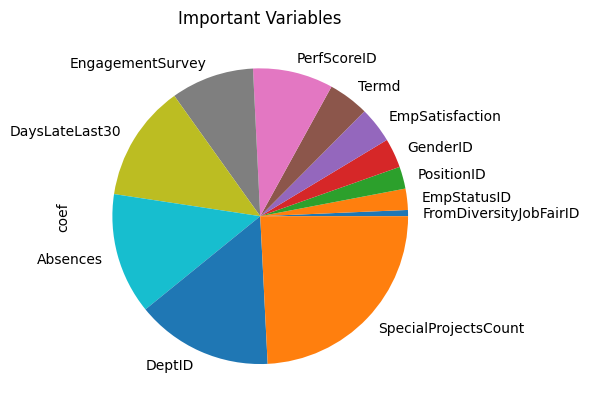

In [161]:
auxdf.coef.plot(kind = 'pie')
plt.title('Important Variables')

## Covid Dataset

In [162]:
covidDataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [163]:
covidDataset.info()
covidDataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


After exploring the dataframe I realize that there is only two different values in each column "Yes" and "No"
So I utilize a technice called Binary Mapping or Manual Encoding

In [164]:
dfCovid = pd.DataFrame() # here I use an empty dataframe were I will store the new Values

rows, columns = covidDataset.shape # i get the columns and rows

print(rows, columns) # this is just for compare the original df with the codifided df

for element in range(columns): # in this for name i used the index to get the name of the column

  name = covidDataset.columns[element] # here I stract the name

  dfCovid[name] = covidDataset[name].map({'Yes': 1, 'No': 0}) # here I use the map function to change Yes to 1 and No to 0

print(dfCovid.shape) #THIS PRINT IS JUS TO COMPARE THE VALUES OF ROWS AND COLUMNS

5434 21
(5434, 21)


Now I have a new dataframe with the codfied variables

In [165]:
dfCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

In [166]:
nan_in_df = dfCovid.isnull().sum()
print(nan_in_df)

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


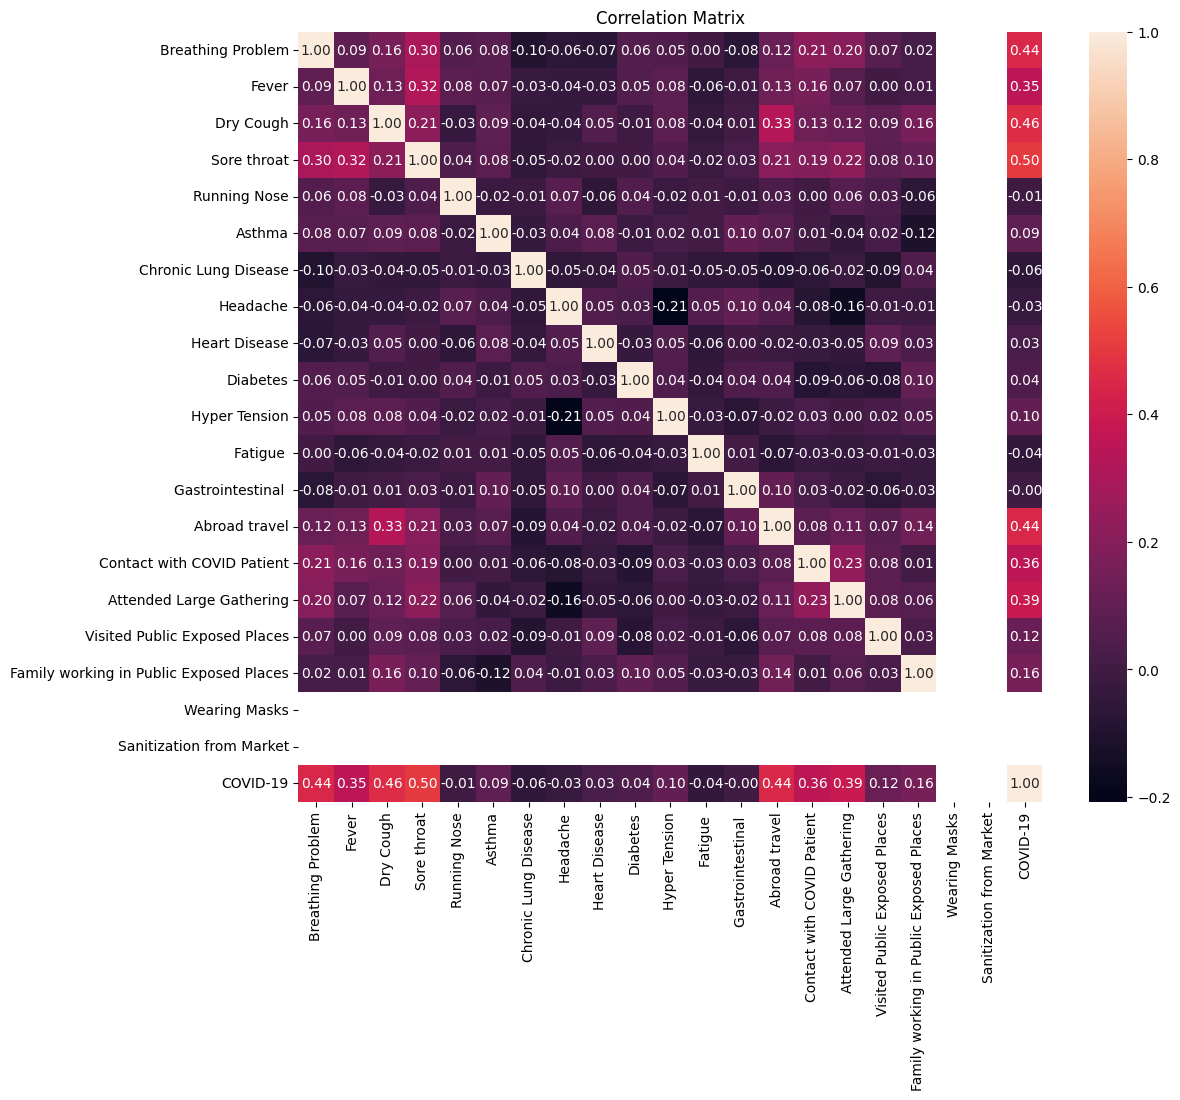

In [167]:
# Now i can use a correlation matrix
corr = dfCovid.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True, fmt = ".2f")

plt.title('Correlation Matrix')
plt.show()

After this correlation matrix the thing that caught my attention were the columns "Wearing Masks" and "Sanitization from Market"


In [168]:
print(dfCovid["Wearing Masks"].unique())
print(dfCovid["Sanitization from Market"].unique())

[0]
[0]


Inside of this columns there is just one variable 0, that equals NO, so in order to not add noice to the model I will eliminate this variables

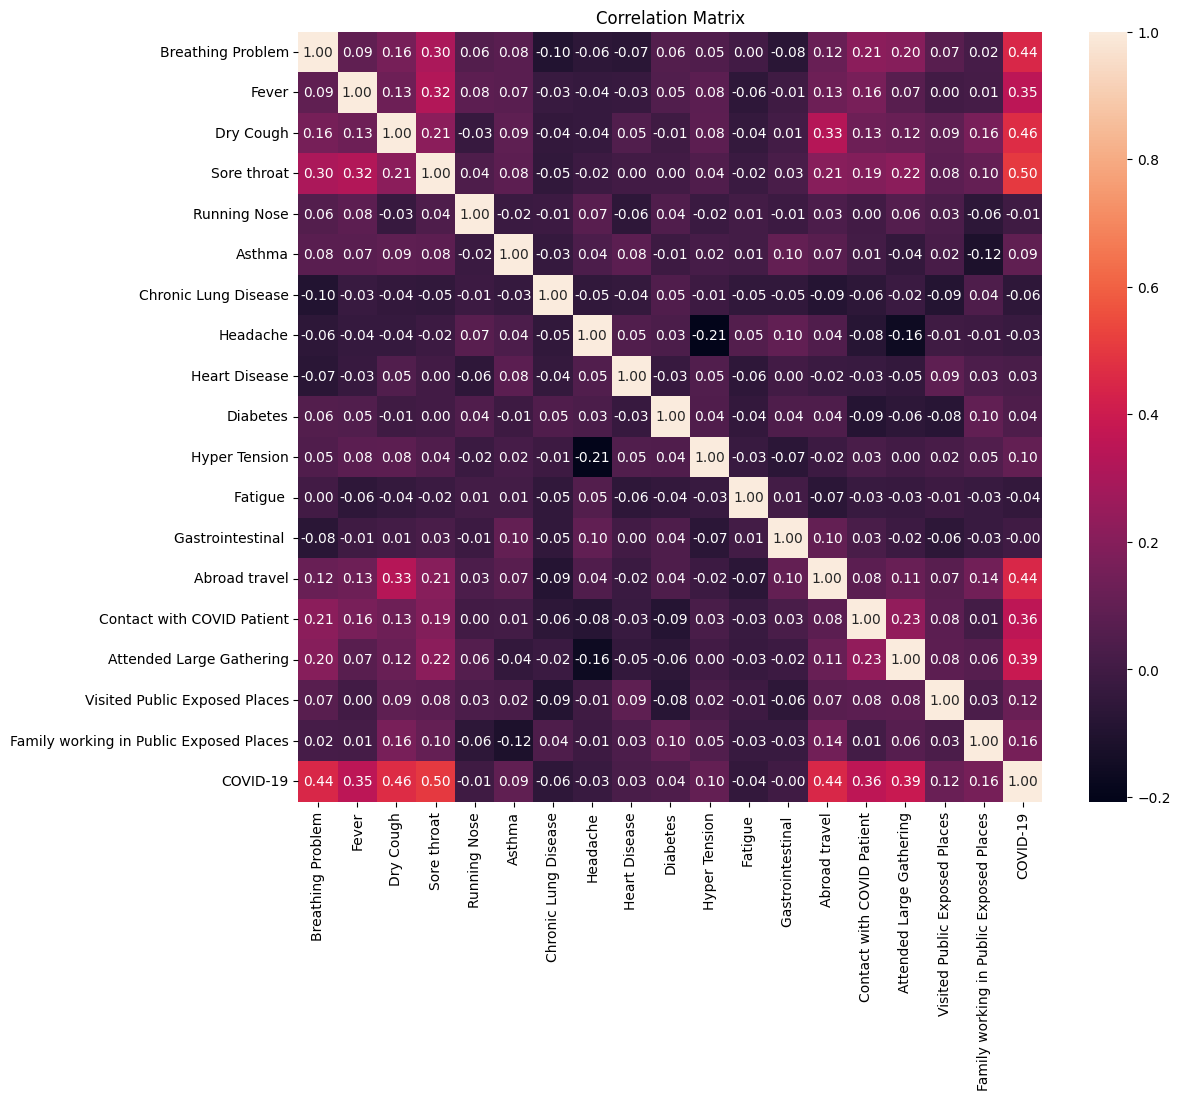

In [169]:
dfCovid.drop(columns = {"Wearing Masks", "Sanitization from Market"}, inplace = True)
# Now i can use a correlation matrix
corr = dfCovid.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True, fmt = ".2f")

plt.title('Correlation Matrix')
plt.show()

I want to predict if someone have COVID.
Analyzing the row of COVID there is variables that are less significant for example:


*   Running Nose
*   Chronic Lung Disease
*   Fatigue

There variable for me are less signigicant because the coeficient is negative so I have two different paths.

*   Use all the variables
*   Eliminate the variables with negative coeficient

For this experiment I would follow both paths in order to compare the score of each path.



### With All variables


In [170]:
covidAllVariablesdf = dfCovid.copy() # make a copy

aux = covidAllVariablesdf.drop(columns=["COVID-19"])
columnsCovid = list(aux.columns)
X = np.asanyarray(aux)
y = np.asanyarray(covidAllVariablesdf["COVID-19"]).reshape(-1,1)
print(X.shape)
print(y.shape)

(5434, 18)
(5434, 1)


In [171]:
# scale the values
# X  = StandardScaler().fit_transform(X)
# y = StandardScaler().fit_transform(y)
# In this case it was not neccesary use the scalers

In [172]:
X_test, X_train, y_test, y_train = train_test_split(X, y , test_size=0.3, random_state= 42)

In [173]:
logRegression = LogisticRegression(solver='lbfgs')
logRegression.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [174]:
# Score with all Variables
trainWithAllVariables = logRegression.score(X_train,y_train)
testWithAllVariables = logRegression.score(X_test,y_test)
print('Train: ', trainWithAllVariables)
print('Test: ', testWithAllVariables)

Train:  0.9668914776210914
Test:  0.9621351564554299


### Important Variables


In [175]:
auxdf = pd.DataFrame()
coef = np.abs((logRegression.coef_.ravel()))
auxdf['coef'] = coef / np.sum(coef)
auxdf['names'] = columnsCovid
auxdf.sort_values(by = 'coef', ascending = True, inplace = True)
auxdf.set_index('names', inplace = True)

print(auxdf)

                                             coef
names                                            
Gastrointestinal                         0.002060
Fatigue                                  0.005341
Asthma                                   0.005886
Hyper Tension                            0.007355
Visited Public Exposed Places            0.009491
Heart Disease                            0.011929
Diabetes                                 0.012155
Chronic Lung Disease                     0.012863
Headache                                 0.015538
Running Nose                             0.022735
Family working in Public Exposed Places  0.034439
Contact with COVID Patient               0.081088
Sore throat                              0.095374
Breathing Problem                        0.097809
Fever                                    0.101263
Dry Cough                                0.103741
Attended Large Gathering                 0.189774
Abroad travel                            0.191160


Text(0.5, 1.0, 'Important Variables')

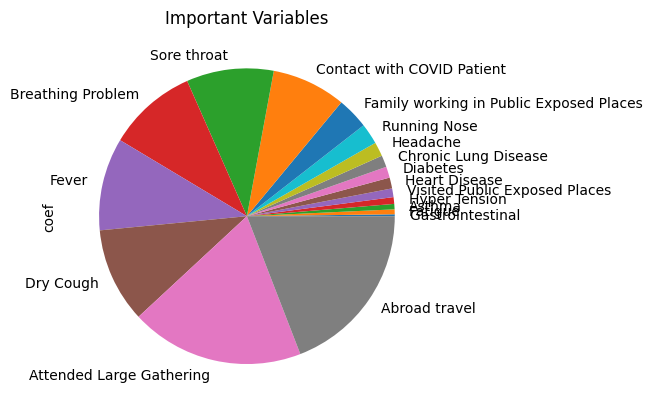

In [176]:
auxdf.coef.plot(kind = 'pie')
plt.title('Important Variables')


###Without:
*   Running Nose
*   Chronic Lung Disease
*   Fatigue

In [177]:
covidNotAllVariablesdf = dfCovid.copy() # make a copy
aux = covidNotAllVariablesdf.drop(columns=["COVID-19", "Running Nose", "Chronic Lung Disease", "Fatigue "])
columnsCovid2 = list(aux.columns)
X = np.asanyarray(aux)
y = np.asanyarray(covidAllVariablesdf["COVID-19"]).reshape(-1,1)
print(X.shape)
print(y.shape)

(5434, 15)
(5434, 1)


In [178]:
X_test, X_train, y_test, y_train = train_test_split(X, y , test_size=0.3, random_state= 42)

In [179]:
logRegression = LogisticRegression(solver='lbfgs')
logRegression.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [180]:
# Score
trainWithoutAllVariables = logRegression.score(X_train,y_train)
testWithoutAllVariables = logRegression.score(X_test,y_test)
print('Train: ', trainWithoutAllVariables)
print('Test: ', testWithoutAllVariables)

Train:  0.9693439607602697
Test:  0.9634499079673942


### Important Variables

In [181]:
auxdf = pd.DataFrame()
coef = np.abs((logRegression.coef_.ravel()))
auxdf['coef'] = coef / np.sum(coef)
auxdf['names'] = columnsCovid2
auxdf.sort_values(by = 'coef', ascending = True, inplace = True)
auxdf.set_index('names', inplace = True)

print(auxdf)

                                             coef
names                                            
Asthma                                   0.002847
Gastrointestinal                         0.003834
Hyper Tension                            0.005632
Heart Disease                            0.009824
Diabetes                                 0.010469
Visited Public Exposed Places            0.012916
Headache                                 0.016945
Family working in Public Exposed Places  0.040352
Contact with COVID Patient               0.083320
Sore throat                              0.101377
Breathing Problem                        0.102171
Fever                                    0.102958
Dry Cough                                0.109233
Attended Large Gathering                 0.194875
Abroad travel                            0.203248


Text(0.5, 1.0, 'Important Variables')

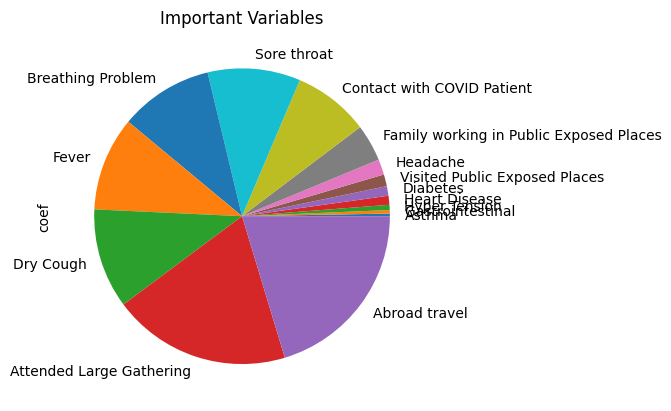

In [182]:
auxdf.coef.plot(kind = 'pie')
plt.title('Important Variables')

### Comparing All vs Without Score:


In [185]:
print('Train All Variables: ', trainWithoutAllVariables)
print('Test All Variables:', testWithoutAllVariables)
print('\n \nTrain Without All Variables: ', trainWithAllVariables)
print('Test Without All Variables: ', testWithAllVariables)


Train All Variables:  0.9693439607602697
Test All Variables: 0.9634499079673942

 
Train Without All Variables:  0.9668914776210914
Test Without All Variables:  0.9621351564554299


As you can see in the previous comparision apparently it is better using all variables to calculate the probability of a person with COVID19

# Conclusion

These are my conclusions for this practice:


*   In the first example, the HumanR Dataset, it is harder to get a good score because of the data quality. Maybe we have to check the quality or get more samples of this information, because, at least in my opinion, there are other factors that can determine the salary of a person. For example, marital status is not a factor, in my opinion, to determine the salary of a person. Maybe we could add "years of experience" or "education," and with that information, we will get interesting results. Also, I feel that the salary has different factors to be calculated.
*  Now, in the second example, the COVID dataset, it is the opposite. We have a good amount of data and also a reliable collection. With the yes or no answers, it is easier to process. Also, at first, in my opinion, there were some variables that aren't necessary, but comparing the results, it is the opposite.

